# Jamil Antoine Jabbour
# SCS 3030 Big Data Tools and Techniques: Mining Financial, Operational and Social Networks Data
# Assignment 02


#### Importing needed library for ploting and extracting data

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.data as web
import numpy as np
import matplotlib.dates as mdates
import datetime
%matplotlib inline

#### Collecting the stocks data of MICROSOFT, GOOGLE, AMAZON, APPLE

In [83]:
data_Google  = web.get_data_yahoo('GOOGL','01/11/2015','31/10/2016',interval='d')
data_Microsoft  = web.get_data_yahoo('MSFT','01/11/2015','31/10/2016',interval='d')
data_Apple  = web.get_data_yahoo('AAPL','01/11/2015','31/10/2016',interval='d')
data_Amazon = web.get_data_yahoo('AMZN','01/11/2015','31/10/2016',interval='d')

#### Creating a DataFrame of  the Adjacent Close column of the stocks data 

In [84]:
df = pd.DataFrame({'APPLE': data_Apple['Adj Close'], 'MICROSOFT': data_Microsoft['Adj Close'], 'GOOGLE':data_Google['Adj Close'],
                   'AMAZON':data_AMAZ['Adj Close']}).dropna()
print df[:5]

                AMAZON       APPLE      GOOGLE  MICROSOFT
Date                                                     
2015-01-12  291.410004  105.621276  497.059998  44.451699
2015-01-13  294.739990  106.559059  501.799988  44.222765
2015-01-14  293.269989  106.153011  505.929993  43.841204
2015-01-15  286.950012  103.271988  504.010010  43.383333
2015-01-16  290.739990  102.469554  510.459991  44.108298


#### Ploting Adjacent Close Stocks 

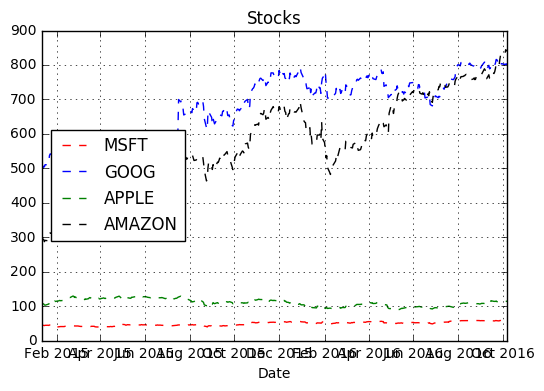

In [85]:
plt.plot(df['MICROSOFT'] ,'r--', label='MSFT')
plt.plot(df['GOOGLE']  ,'b--', label='GOOG')
plt.plot(df['APPLE'],'g--', label='APPLE')
plt.plot(df['AMAZON'],'k--', label='AMAZON')
plt.grid()
plt.title('Stocks')
plt.xlabel('Date')
plt.legend(loc=6)

#### Extract the data to an Excel Sheet

In [86]:
excel_file = 'Compare_Stocks.xlsx'
sheet_name = 'Data'
 
writer = pd.ExcelWriter(excel_file, engine = 'xlsxwriter')
df.to_excel(writer, sheet_name = sheet_name)
 
workbook = writer.book
worksheet = writer.sheets[sheet_name]
worksheet.set_column('A:D', 20)
 
chart = workbook.add_chart({'type': 'line'})
max_row = len(df) + 1
chart.add_series({
    'name':       ['Data', 0, 1],
    'categories': ['Data', 2, 0, max_row, 0],
    'values':     ['Data', 2, 1, max_row, 1],
    'line':       {'width': 1.00},})
chart.add_series({
        'name':       ['Data', 0, 2],
        'categories': ['Data', 2, 0, max_row, 0],
        'line':       {'width': 1.00},
        'values':     ['Data', 2, 2, max_row, 2]})
chart.add_series({
        'name':       ['Data', 0, 3],
        'categories': ['Data', 2, 0, max_row, 0],
        'line':       {'width': 1.00},
        'values':     ['Data', 2, 3, max_row, 3]})
chart.add_series({
        'name':       ['Data', 0, 4],
        'categories': ['Data', 2, 0, max_row, 0],
        'line':       {'width': 1.00},
        'values':     ['Data', 2, 4, max_row, 4]})

 
chart.set_x_axis({'name': 'Date', 'date_axis': True})
chart.set_y_axis({'name': 'Price', 'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'top'})
 
worksheet.insert_chart('F1', chart)
writer.save()